In [1]:
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats



In [2]:
df=pd.read_csv('de01-data.csv')
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,NaN,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [3]:
crosdata = pd.crosstab(df['InterviewScore'], [df['Sexuality']], rownames=['InterviewScore'], colnames=['Sexuality'])
crosdata
odd_ratio, p_value = stats.fisher_exact(crosdata)
print('odd ratio is : ' + str(odd_ratio))
print('p_value is : ' + str(p_value))

ValueError: The input `table` must be of shape (2, 2).

In [ ]:
from scipy.stats import chi2_contingency
# Hãy kiểm tra xem có sự phụ thuộc nào giữa khối thi và khu vực khi đăng ký dự thi hay không
crosdata = pd.crosstab(df['InterviewScore'], [df['Sexuality']], rownames=['InterviewScore'], colnames=['Sexuality'])
crosdata
stat, p, dof, expected = chi2_contingency(crosdata)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9300780652577139
Independent (H0 holds true)


In [ ]:
model = ols('ProfessionalScore ~ TimeToPlay+ TimeToStudy + TimeToPlay:TimeToStudy',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)

                           df       sum_sq   mean_sq         F    PR(>F)
TimeToPlay                1.0     2.958175  2.958175  2.265642  0.132588
TimeToStudy               1.0     0.310824  0.310824  0.238058  0.625720
TimeToPlay:TimeToStudy    1.0     0.020212  0.020212  0.015481  0.901007
Residual                996.0  1300.444699  1.305667       NaN       NaN


In [ ]:
model = ols ('ProfessionalScore  ~ Sexuality', data=df).fit()
result = sm.stats.anova_lm(model, type = 2)

print(result)

              df       sum_sq   mean_sq         F    PR(>F)
Sexuality    4.0     2.501237  0.625309  0.478149  0.751816
Residual   995.0  1301.232673  1.307772       NaN       NaN


In [ ]:
from sklearn import linear_model
data=df[['TimeToPlay','TimeToStudy','ProfessionalScore']]
df = pd.DataFrame(data)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Xác định biến độc lập và biến phụ thuộc
X = df[['TimeToPlay', 'TimeToStudy']]
y = df['ProfessionalScore']

# Khớp mô hình với dữ liệu
model.fit(X, y)

# In ra các tham số hồi quy
print("Hệ số góc (slope) cho ThoiGianNghi:", model.coef_[0])
print("Hệ số góc (slope) cho ThoiGianHoc:", model.coef_[1])
print("Hệ số giao (intercept):", model.intercept_)

Hệ số góc (slope) cho ThoiGianNghi: 0.018681626699237366
Hệ số góc (slope) cho ThoiGianHoc: 0.006206967052976729
Hệ số giao (intercept): 1.813415695603688


In [ ]:
# Dữ liệu về thời gian dành cho việc riêng và thời gian dành cho việc học
freetime=df['TimeToPlay']
StudyTime=df['TimeToStudy']
Score=df['ProfessionalScore']
# Thêm cột hằng số cho mô hình
X = sm.add_constant(np.column_stack((freetime, StudyTime)))

# Tạo mô hình hồi quy tuyến tính OLS
model = sm.OLS(Score, X).fit()

# Lấy thông tin về R-squared
rsquared = model.rsquared

# In kết quả
print(f"R-squared: {rsquared * 100:.2f}%")

R-squared: 0.25%


In [ ]:
import statsmodels.api as sm

# Xác định các biến độc lập và biến phụ thuộc
X = df[['TimeToPlay', 'TimeToStudy']]
y = df['ProfessionalScore']

# Thêm intercept vào X
X = sm.add_constant(X)

# Tạo mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# Lấy bảng thống kê tóm tắt
summary = model.summary()

# In bảng thống kê tóm tắt để xem các hệ số ước tính
print(summary)

# Tính phần trăm biến thiên giải thích
explained_variance_percentage_thoi_gian_rieng = (model.params['TimeToPlay'] / model.mse_resid) * 100
explained_variance_percentage_thoi_gian_hoc = (model.params['TimeToStudy'] / model.mse_resid) * 100

print(f"Phần trăm biến thiên giải thích bởi thoi_gian_rieng: {explained_variance_percentage_thoi_gian_rieng}%")
print(f"Phần trăm biến thiên giải thích bởi thoi_gian_hoc: {explained_variance_percentage_thoi_gian_hoc}%")


                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Mon, 23 Oct 2023   Prob (F-statistic):              0.286
Time:                        18:29:25   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [ ]:
data=df['ProfessionalScore']
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Xác định khoảng dữ liệu nghi ngờ bất thường
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print("Khoảng dữ liệu nghi ngờ bất thường (Suspicious Outlier Range):")
print(f"Giá trị dưới ngưỡng: {lower_threshold}")
print(f"Giá trị trên ngưỡng: {upper_threshold}")




Khoảng dữ liệu nghi ngờ bất thường (Suspicious Outlier Range):
Giá trị dưới ngưỡng: -1.8499999999999996
Giá trị trên ngưỡng: 5.75


lower bound =  -1.8499999999999996
upper bound =  5.75
IQR 1.9
ngoai bien dưới -1.2249999999999996
ngoai bien tren 9.475


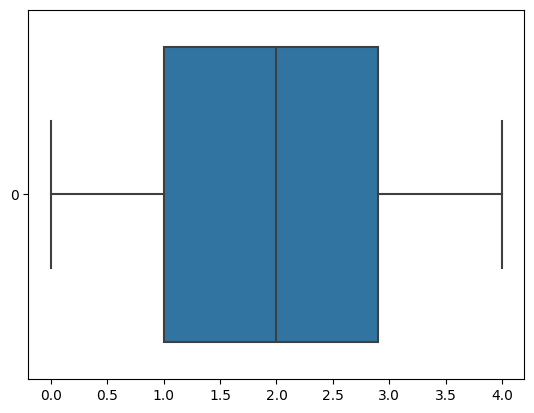

In [ ]:
import seaborn as sns
sns.boxplot(data=df['ProfessionalScore'],orient="h")
print('lower bound = ', df['ProfessionalScore'].quantile(0.25) - 1.5*(df['ProfessionalScore'].quantile(0.75) -
df['ProfessionalScore'].quantile(0.25)))
print('upper bound = ', df['ProfessionalScore'].quantile(0.75) + 1.5*(df['ProfessionalScore'].quantile(0.75) -
df['ProfessionalScore'].quantile(0.25)))
IQR = df['ProfessionalScore'].quantile(0.75) - df['ProfessionalScore'].quantile(0.25)
print('IQR',IQR)
print('ngoai bien dưới', 1.625 -1.5*IQR)
print('ngoai bien tren', 6.625 +1.5*IQR)


In [ ]:
df[['TimeToStudy']].kurtosis()


TimeToStudy   -1.156745
dtype: float64

Khoảng thời gian có xác suất cao nhất là từ 6.0 đến 8.0 giờ


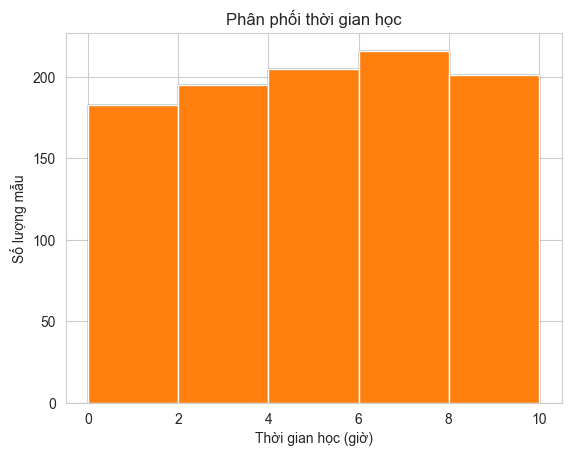

In [ ]:
plt.hist(df['TimeToStudy'], bins=5, edgecolor='k')
plt.xlabel('Thời gian học (giờ)')
plt.ylabel('Số lượng mẫu')
plt.title('Phân phối thời gian học')
plt.grid(True)

# Xác định bin có tần suất cao nhất
bin_counts, bin_edges, _ = plt.hist(df['TimeToStudy'], bins=5)
max_bin_index = bin_counts.argmax()

# Xác định khoảng thời gian tương ứng với bin có tần suấ|t cao nhất
start_time = bin_edges[max_bin_index]
end_time = bin_edges[max_bin_index + 1]

print(f"Khoảng thời gian có xác suất cao nhất là từ {start_time} đến {end_time} giờ")

plt.show()


In [ ]:
plt.scatter(df['TimeToStudy'], df['ExpectedSalary'])

# Đặt tên trục và tiêu đề
plt.xlabel('Thời gian dành cho việc học')
plt.ylabel('Lương mong đợi')
plt.title('Biểu đồ phân tán giữa TimeToStudy và ExpectedSalary')

# Hiển thị biểu đồ
plt.grid(True)
plt.show()

KeyError: 'ExpectedSalary'

In [ ]:
newdf.groupby(['KV'])['KV'].agg(['count'])
crosstab = .groupby(df['InterviewScore'], df['Sexuality'])

# Tìm giá trị nhỏ nhất trong bảng Crosstab và lấy index (đóng vai trò là nhóm)
min_value = crosstab.min().idxmin()

print("Nhóm có điểm phỏng vấn thấp nhất là:", min_value)

KeyError: 'InterviewScore'

In [ ]:
mean_diem_phong_van = df['InterviewScore'].count()

print("Giá trị trung bình của điểm phỏng vấn của sinh viên là:", mean_diem_phong_van)

KeyError: 'InterviewScore'

c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

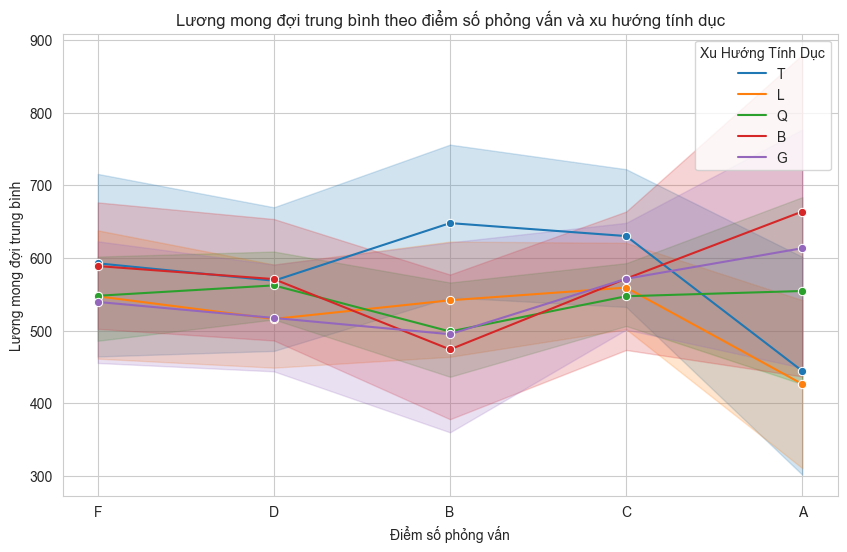

In [ ]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(data=df, x='InterviewScore', y='ExpectedSalary', hue='Sexuality', marker='o')

# Đặt tiêu đề và nhãn
plt.title('Lương mong đợi trung bình theo điểm số phỏng vấn và xu hướng tính dục')
plt.xlabel('Điểm số phỏng vấn')
plt.ylabel('Lương mong đợi trung bình')

# Hiển thị biểu đồ
plt.legend(title='Xu Hướng Tính Dục')

In [ ]:
model = ols('ProfessionalScore ~ TimeToPlay + TimeToStudy + TimeToPlay:TimeToStudy',data=df).fit()
result = sm.stats.anova_lm(model, type=2)
 
# Print the result
print(result)


                           df       sum_sq   mean_sq         F    PR(>F)
TimeToPlay                1.0     2.958175  2.958175  2.265642  0.132588
TimeToStudy               1.0     0.310824  0.310824  0.238058  0.625720
TimeToPlay:TimeToStudy    1.0     0.020212  0.020212  0.015481  0.901007
Residual                996.0  1300.444699  1.305667       NaN       NaN


In [ ]:
crosstab = pd.crosstab(df['Sexuality'], df['ProfessionalScore'])

# Tìm giá trị yếu vị
mode_value = crosstab.stack().idxmax()

print("Giá trị yếu vị trong bảng Crosstab là:", mode_value)

Giá trị yếu vị trong bảng Crosstab là: ('Q', 2.3)


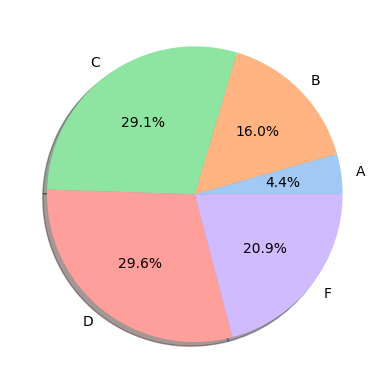

In [4]:
import seaborn as sns
gb = df.groupby(['InterviewScore'])['InterviewScore'].agg(['count'])

labels = gb.index
data = list(gb['count'])

colors = sns.color_palette('pastel')

plt.pie(data, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)

plt.show()